In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('Ethenicity_dataset/age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [4]:
df = df.drop(['img_name'], axis=1)

In [5]:
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [7]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: age, Length: 104, dtype: int64

In [8]:
df['ethnicity'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

In [9]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [10]:
df.dtypes

age           int64
ethnicity     int64
gender        int64
pixels       object
dtype: object

In [11]:
import matplotlib.pyplot as plt 

In [12]:
x=np.array(df['pixels'].tolist())

In [13]:
x=x.reshape(x.shape[0],48,48,1)

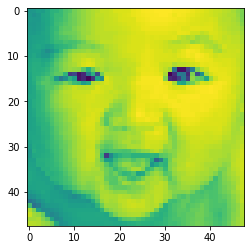

In [14]:
plt.imshow(x[10])

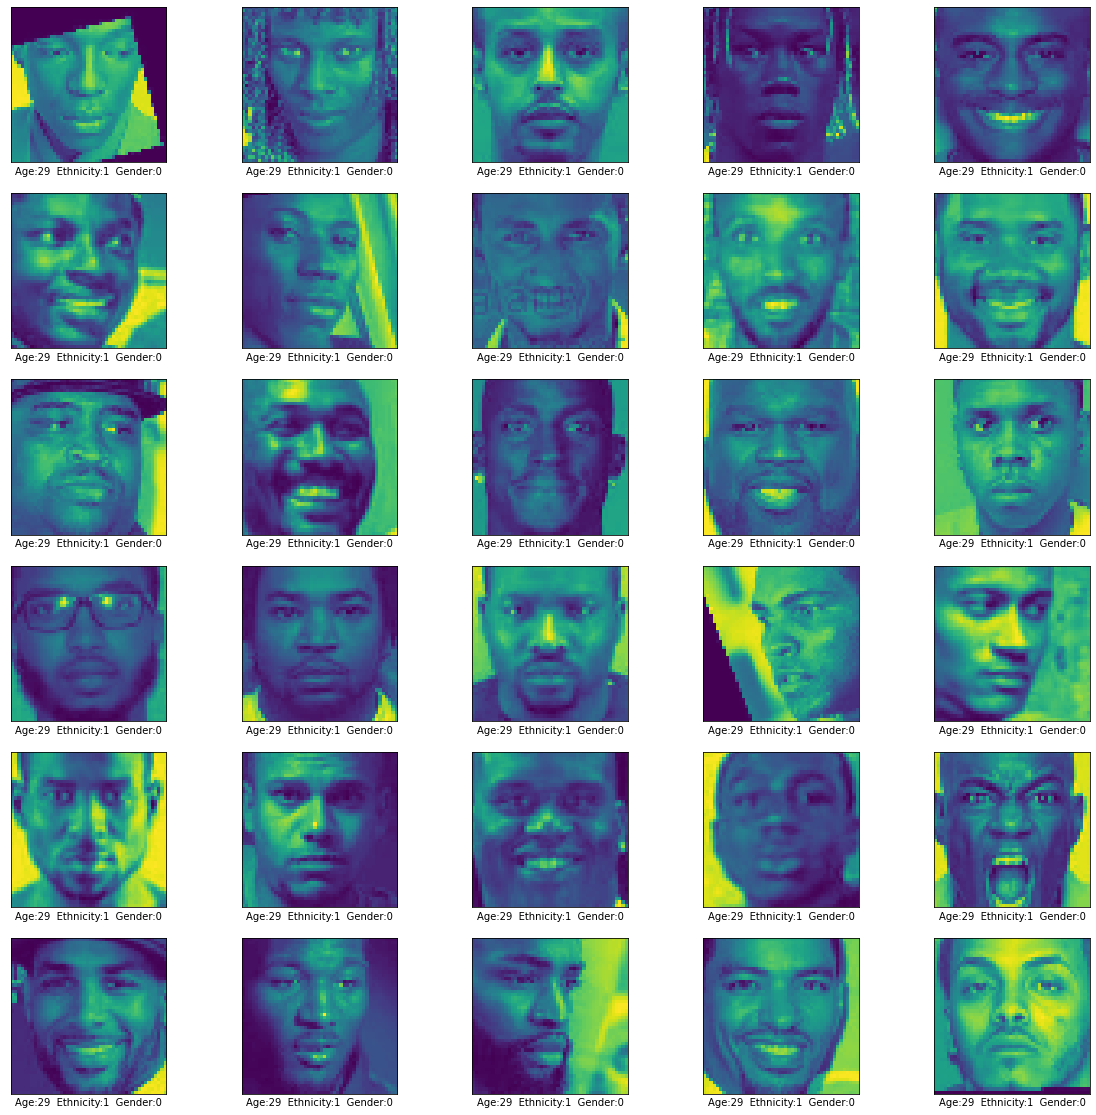

In [15]:
plt.figure(figsize=(20,20))
for i in range(10000,10030):
    plt.subplot(6,5,(i%30)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

In [16]:
from sklearn.svm import SVC

In [17]:
from sklearn.model_selection import train_test_split

# X = df.drop(['gender','age', 'ethnicity'],axis=1)
y = df.drop(['pixels','age', 'ethnicity'],axis=1)

x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
x_train.shape, y_train.shape

((18964, 48, 48, 1), (18964, 1))

In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense,MaxPool2D,Dropout,Softmax,Conv2D,Flatten
from tensorflow.keras import Sequential

In [21]:
model = Sequential([
    Conv2D(124,(3,3),padding='same',input_shape = (48,48,1)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(64,(3,3),padding='same'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,(3,3),padding='same'),
    MaxPool2D(pool_size=(2,2)),
    
    Dropout(0.25),
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(16,activation = 'relu'),
    Dense(8,activation = 'relu'),
    
    
    Dense(1,activation='sigmoid')

])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 124)       1240      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 124)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        71488     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0

In [23]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [25]:
history = model.fit(x_train,y_train,epochs = 2, validation_data = (x_test, y_test))

Epoch 1/2
593/593 [==============================] - 77s 130ms/step - loss: 0.3396 - accuracy: 0.8451 - val_loss: 0.3079 - val_accuracy: 0.8650
Epoch 2/2
593/593 [==============================] - 78s 132ms/step - loss: 0.2935 - accuracy: 0.8696 - val_loss: 0.2802 - val_accuracy: 0.8781


In [26]:
model.save('model.h5')